# **개요**

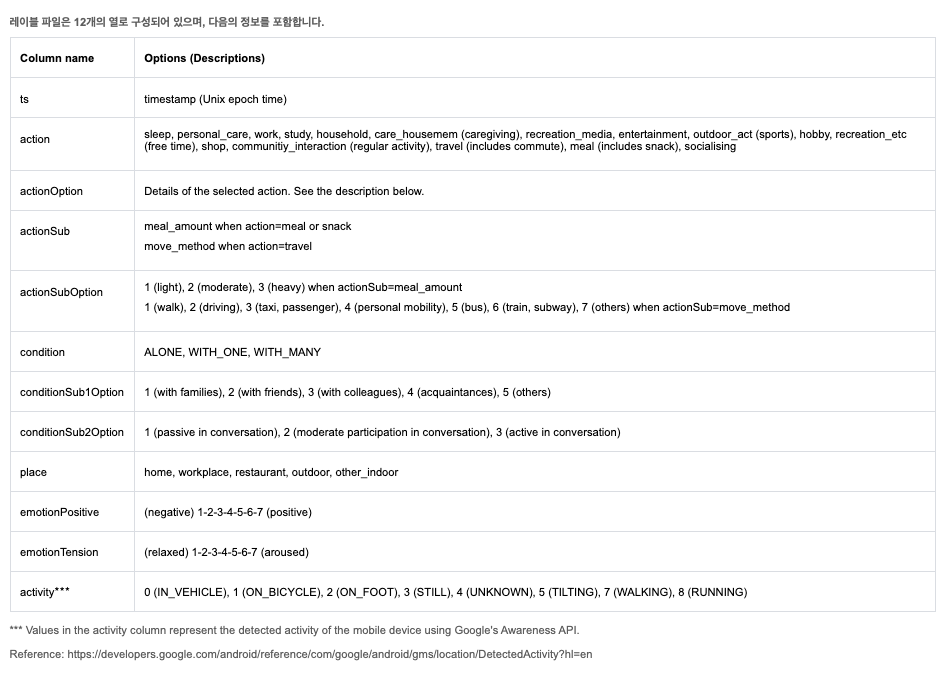

레이블 파일의 actionOption 열은 아래의 정보로 구성되어 있습니다.

==================================================================================================

111	Sleep

112	Sleepless

121	Meal

122	Snack

131	Medical services, treatments, sick rest

132	Personal hygiene (bath)

133	Appearance management (makeup, change of clothes)

134	Beauty-related services

211	Main job

212	Side job

213	Rest during work

22	Job search

311	School class / seminar (listening)

312	Break between classes

313	School homework, self-study (individual)

314	Team project (in groups)

321	Private tutoring (offline)

322	Online courses

41	Preparing food and washing dishes

42	Laundry and ironing

43	Housing management and cleaning

44	Vehicle management

45	Pet and plant caring

46	Purchasing goods and services (grocery/take-out)

51	Caring for children under 10 who live together

52	Caring for elementary, middle, and high school students over 10 who live together

53	Caring for a spouse

54	Caring for parents and grandparents who live together

55	Caring for other family members who live together

56	Caring for parents and grandparents who do not live together

57	Caring for other family members who do not live together

81	Personal care-related travel

82	Commuting and work-related travel

83	Education-related travel

84	Travel related to housing management

85	Travel related to caring for family and household members

86	Travel related to participation and volunteering

87	Socializing and leisure-related travel

61	Religious activities

62	Political activity

63	Ceremonial activities

64	Volunteer

711	Offline communication

712	Video or voice call

713	Text or email (Online)

721	Reading books, newspapers, and magazines

722	Watching TV or video

723	Listening to audio

724	Internet search or blogging

725	Gaming (mobile, computer, video)

741	Watching a sporting event

742	Watching movie

743	Concerts and plays

744	Art galleries and museums

744	Amusement Park, zoo

745	Festival, carnival

746	Driving, sightseeing, excursion

751	Walking

752	Running, jogging

753	Climbing, hiking

754	Biking

755	Ball games (soccer, basketball, baseball, tennis, etc)

756	Personal exercises (yoga, pilates, etc.)

756	Camping, fishing

761	Group games (board games, card games, puzzles, etc.)

762	Personal hobbies (woodworking, gardening, etc.)

763	Group performances (orchestra, choir, troupe, etc.)

764	Liberal arts and learning (languages, musical instruments, etc.)

791	Nightlife

792	Smoking

793	Do nothing and rest

91	Online shopping

92	Offline shopping

==================================================================================================

# **데이터 load, 라이브러리 import**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

**Train Data**

In [ ]:
df_usersurvey_train = pd.read_csv('/content/drive/MyDrive/24 논문 경진대회/Training Dataset/user_survey_2020.csv')
df_usersurvey_train.head(3)

,userId,date,amPm,startInput,endInput,sleep,sleepProblem,dream,amCondition,amEmotion,pmEmotion,pmStress,pmFatigue,caffeine,cAmount(ml),alcohol,aAmount(ml)
0,user24,2020-08-29,am,2020-08-29 21:23,2020-08-29 21:23,4.0,0.0,3.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,user24,2020-08-29,pm,2020-08-29 21:23,2020-08-29 21:23,NaN,NaN,NaN,NaN,NaN,4.0,4.0,2.0,NaN,NaN,NaN,NaN
2,user24,2020-08-30,am,2020-08-30 7:41,2020-08-30 7:41,3.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_usersurvey_train['userId'] = df_usersurvey_train['userId'].str.replace('user', '').astype(int)
df_sorted = df_usersurvey_train.sort_values(by='userId').reset_index(drop=True)
df_sorted['userId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30])

In [ ]:
df_usersurvey_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   userId        1230 non-null   int64  
 1   date          1230 non-null   object 
 2   amPm          1230 non-null   object 
 3   startInput    1230 non-null   object 
 4   endInput      1230 non-null   object 
 5   sleep         615 non-null    float64
 6   sleepProblem  615 non-null    float64
 7   dream         615 non-null    float64
 8   amCondition   615 non-null    float64
 9   amEmotion     615 non-null    float64
 10  pmEmotion     615 non-null    float64
 11  pmStress      615 non-null    float64
 12  pmFatigue     615 non-null    float64
 13  caffeine      282 non-null    object 
 14  cAmount(ml)   282 non-null    float64
 15  alcohol       114 non-null    object 
 16  aAmount(ml)   113 non-null    float64
dtypes: float64(10), int64(1), object(6)
memory usage: 163.5+ KB


즉, subject id : user 1 ~ 12, 21 ~ 30

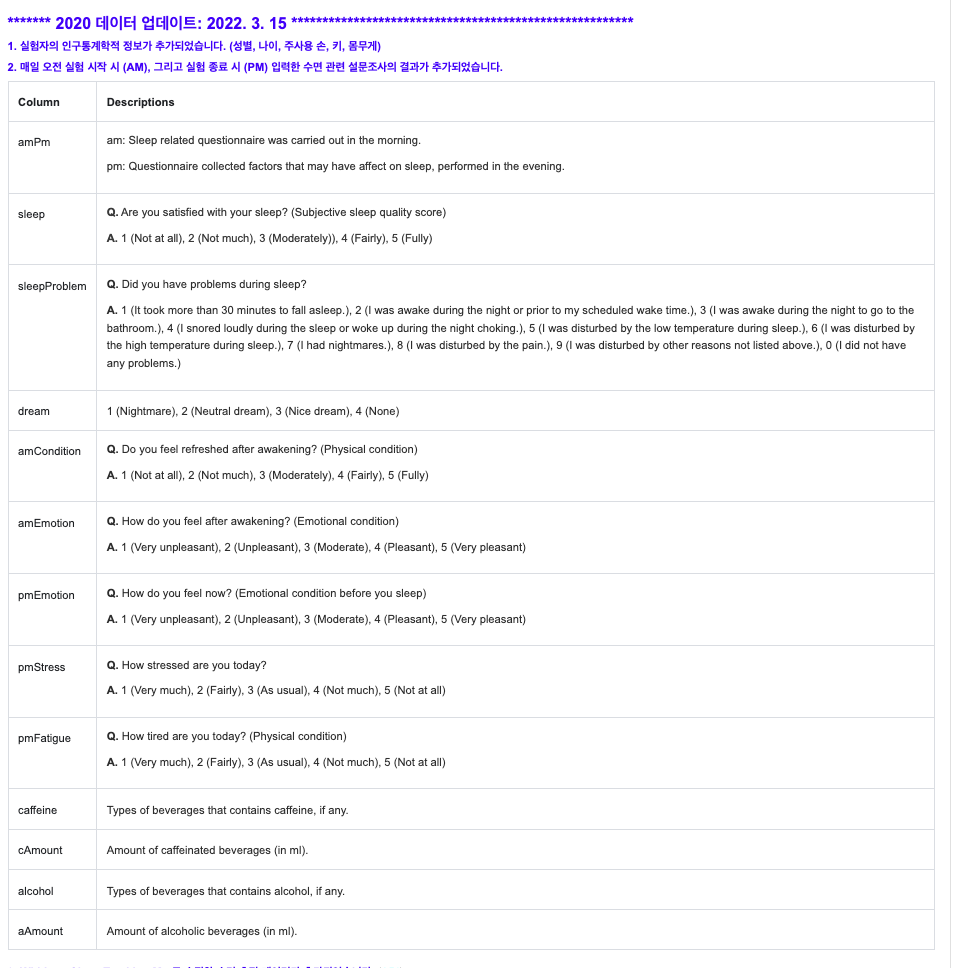

In [ ]:
df_usersleep_train = pd.read_csv('/content/drive/MyDrive/24 논문 경진대회/Training Dataset/user_sleep_2020.csv')
df_usersleep_train.head(3)

,userId,timezone,date,startDt,endDt,lastUpdate,wakeupduration,lightsleepduration,deepsleepduration,wakeupcount,...,hr_average,hr_min,hr_max,rr_average,rr_min,rr_max,breathing_disturbances_intensity,snoring,snoringepisodecount,sleep_score
0,user24,Asia/Seoul,2020-08-30,1598708760,1598740860,1598748252,3840,13800,9000,3,...,72,63,82,15,10,20,10,840,1,86
1,user24,Asia/Seoul,2020-08-31,1598800140,1598825940,1598833333,4740,9540,6360,1,...,69,60,82,15,11,20,8,2700,3,52
2,user24,Asia/Seoul,2020-09-01,1598885940,1598908800,1598916190,1920,8760,4740,1,...,70,58,94,15,12,23,8,0,0,61


In [ ]:
df_usersleep_train['userId'] = df_usersleep_train['userId'].str.replace('user', '').astype(int)
df_sorted3 = df_usersleep_train.sort_values(by='userId').reset_index(drop=True)
df_sorted3['userId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30])

In [ ]:
df_usersleep_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   userId                            615 non-null    int64 
 1   timezone                          615 non-null    object
 2   date                              615 non-null    object
 3   startDt                           615 non-null    int64 
 4   endDt                             615 non-null    int64 
 5   lastUpdate                        615 non-null    int64 
 6   wakeupduration                    615 non-null    int64 
 7   lightsleepduration                615 non-null    int64 
 8   deepsleepduration                 615 non-null    int64 
 9   wakeupcount                       615 non-null    int64 
 10  durationtosleep                   615 non-null    int64 
 11  remsleepduration                  615 non-null    int64 
 12  durationtowakeup      

In [ ]:
df_usersleep_train.columns

Index(['userId', 'timezone', 'date', 'startDt', 'endDt', 'lastUpdate',
       'wakeupduration', 'lightsleepduration', 'deepsleepduration',
       'wakeupcount', 'durationtosleep', 'remsleepduration',
       'durationtowakeup', 'hr_average', 'hr_min', 'hr_max', 'rr_average',
       'rr_min', 'rr_max', 'breathing_disturbances_intensity', 'snoring',
       'snoringepisodecount', 'sleep_score'],
      dtype='object')

In [ ]:
df_usersleep_train = df_usersleep_train[['userId', 'date',
       'wakeupduration', 'lightsleepduration', 'deepsleepduration',
       'wakeupcount', 'durationtosleep', 'remsleepduration',
       'durationtowakeup', 'hr_average', 'hr_min', 'hr_max', 'rr_average',
       'rr_min', 'rr_max', 'breathing_disturbances_intensity', 'snoring',
       'snoringepisodecount', 'sleep_score']]
df_usersleep_train

,userId,date,wakeupduration,lightsleepduration,deepsleepduration,wakeupcount,durationtosleep,remsleepduration,durationtowakeup,hr_average,hr_min,hr_max,rr_average,rr_min,rr_max,breathing_disturbances_intensity,snoring,snoringepisodecount,sleep_score
0,24,2020-08-30,3840,13800,9000,3,1740,5280,0,72,63,82,15,10,20,10,840,1,86
1,24,2020-08-31,4740,9540,6360,1,3180,4980,600,69,60,82,15,11,20,8,2700,3,52
2,24,2020-09-01,1920,8760,4740,1,1440,7440,0,70,58,94,15,12,23,8,0,0,61
3,24,2020-09-02,2760,7740,7440,1,1380,2220,0,68,60,80,15,12,19,-1,240,1,40
4,24,2020-09-03,3900,11640,7620,1,1680,2040,600,71,61,83,15,11,25,7,300,1,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,6,2020-10-05,8460,11820,4560,1,7740,5940,0,48,43,81,17,12,22,13,2400,5,60
611,6,2020-10-06,1920,13200,7500,1,1320,4680,600,52,47,84,17,10,23,10,1380,4,79
612,6,2020-10-07,12420,8520,1500,3,10440,0,0,47,42,76,16,12,20,-1,1620,4,20
613,6,2020-10-08,4380,9240,4560,2,2820,1080,0,52,47,68,17,10,20,-1,2280,2,20


# **데이터전처리**

### **테이블 병합**

- 우선, startInput, endInput는 분석/모델링에 의미 없는 수치로 가정

In [ ]:
df_usersurvey_train_am = df_usersurvey_train[df_usersurvey_train['amPm'] == 'am']
df_usersurvey_train_am = df_usersurvey_train_am[['userId', 'date', 'sleep', 'sleepProblem', 'dream', 'amCondition', 'amEmotion']]
df_usersurvey_train_am

,userId,date,sleep,sleepProblem,dream,amCondition,amEmotion
0,24,2020-08-29,4.0,0.0,3.0,3.0,4.0
2,24,2020-08-30,3.0,2.0,2.0,2.0,3.0
4,24,2020-08-31,3.0,2.0,2.0,3.0,3.0
6,24,2020-09-01,4.0,0.0,4.0,4.0,3.0
8,24,2020-09-02,4.0,0.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...
1220,6,2020-10-04,4.0,0.0,4.0,4.0,4.0
1222,6,2020-10-05,4.0,0.0,4.0,4.0,3.0
1224,6,2020-10-06,4.0,0.0,4.0,4.0,4.0
1226,6,2020-10-07,2.0,9.0,4.0,2.0,3.0


In [ ]:
df_usersurvey_train_am.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 0 to 1228
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   userId        615 non-null    int64  
 1   date          615 non-null    object 
 2   sleep         615 non-null    float64
 3   sleepProblem  615 non-null    float64
 4   dream         615 non-null    float64
 5   amCondition   615 non-null    float64
 6   amEmotion     615 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 54.6+ KB


In [ ]:
df_usersurvey_train_pm = df_usersurvey_train[df_usersurvey_train['amPm'] == 'pm']
df_usersurvey_train_pm = df_usersurvey_train_pm[['userId', 'date', 'pmEmotion', 'pmStress', 'pmFatigue', 'caffeine', 'cAmount(ml)', 'alcohol', 'aAmount(ml)']]
df_usersurvey_train_pm

,userId,date,pmEmotion,pmStress,pmFatigue,caffeine,cAmount(ml),alcohol,aAmount(ml)
1,24,2020-08-29,4.0,4.0,2.0,NaN,NaN,NaN,NaN
3,24,2020-08-30,4.0,5.0,2.0,coffee,200.0,NaN,NaN
5,24,2020-08-31,4.0,2.0,4.0,coffee,200.0,NaN,NaN
7,24,2020-09-01,5.0,4.0,3.0,coffee,150.0,NaN,NaN
9,24,2020-09-02,4.0,4.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1221,6,2020-10-04,3.0,2.0,3.0,NaN,NaN,NaN,NaN
1223,6,2020-10-05,4.0,4.0,4.0,NaN,NaN,NaN,NaN
1225,6,2020-10-06,4.0,4.0,4.0,NaN,NaN,NaN,NaN
1227,6,2020-10-07,5.0,2.0,3.0,coffee,250.0,NaN,NaN


In [ ]:
df_usersurvey_train_pm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 1 to 1229
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       615 non-null    int64  
 1   date         615 non-null    object 
 2   pmEmotion    615 non-null    float64
 3   pmStress     615 non-null    float64
 4   pmFatigue    615 non-null    float64
 5   caffeine     282 non-null    object 
 6   cAmount(ml)  282 non-null    float64
 7   alcohol      114 non-null    object 
 8   aAmount(ml)  113 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 64.2+ KB


In [ ]:
df_usersurvey_train_merged = pd.merge(df_usersurvey_train_am, df_usersurvey_train_pm, on = ['userId', 'date'], how = 'inner' )
df_usersurvey_train_merged = pd.merge(df_usersurvey_train_merged, df_usersleep_train, on = ['userId', 'date'], how = 'inner' )

In [ ]:
df_usersurvey_train_merged

,userId,date,sleep,sleepProblem,dream,amCondition,amEmotion,pmEmotion,pmStress,pmFatigue,...,hr_average,hr_min,hr_max,rr_average,rr_min,rr_max,breathing_disturbances_intensity,snoring,snoringepisodecount,sleep_score
0,24,2020-08-30,3.0,2.0,2.0,2.0,3.0,4.0,5.0,2.0,...,72,63,82,15,10,20,10,840,1,86
1,24,2020-08-31,3.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,...,69,60,82,15,11,20,8,2700,3,52
2,24,2020-09-01,4.0,0.0,4.0,4.0,3.0,5.0,4.0,3.0,...,70,58,94,15,12,23,8,0,0,61
3,24,2020-09-02,4.0,0.0,4.0,2.0,4.0,4.0,4.0,2.0,...,68,60,80,15,12,19,-1,240,1,40
4,24,2020-09-03,4.0,0.0,2.0,2.0,3.0,3.0,2.0,2.0,...,71,61,83,15,11,25,7,300,1,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,6,2020-10-04,4.0,0.0,4.0,4.0,4.0,3.0,2.0,3.0,...,48,42,70,17,10,25,14,2820,4,75
572,6,2020-10-05,4.0,0.0,4.0,4.0,3.0,4.0,4.0,4.0,...,48,43,81,17,12,22,13,2400,5,60
573,6,2020-10-06,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,...,52,47,84,17,10,23,10,1380,4,79
574,6,2020-10-07,2.0,9.0,4.0,2.0,3.0,5.0,2.0,3.0,...,47,42,76,16,12,20,-1,1620,4,20


## **값 수정(알코올, 카페인 컬럼 단순화)**

In [ ]:
df_usersurvey_train_merged['caffeine'] = df_usersurvey_train_merged['caffeine'].apply(lambda x: 'Y' if pd.notnull(x) else 'N')
df_usersurvey_train_merged['alcohol'] = df_usersurvey_train_merged['alcohol'].apply(lambda x: 'Y' if pd.notnull(x) else 'N')

## **결측치 처리, 인코딩/스케일링**

In [ ]:
df_usersurvey_train_merged = df_usersurvey_train_merged.fillna(0)
df_usersurvey_train_merged.head()

,userId,date,sleep,sleepProblem,dream,amCondition,amEmotion,pmEmotion,pmStress,pmFatigue,...,hr_average,hr_min,hr_max,rr_average,rr_min,rr_max,breathing_disturbances_intensity,snoring,snoringepisodecount,sleep_score
0,24,2020-08-30,3.0,2.0,2.0,2.0,3.0,4.0,5.0,2.0,...,72,63,82,15,10,20,10,840,1,86
1,24,2020-08-31,3.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,...,69,60,82,15,11,20,8,2700,3,52
2,24,2020-09-01,4.0,0.0,4.0,4.0,3.0,5.0,4.0,3.0,...,70,58,94,15,12,23,8,0,0,61
3,24,2020-09-02,4.0,0.0,4.0,2.0,4.0,4.0,4.0,2.0,...,68,60,80,15,12,19,-1,240,1,40
4,24,2020-09-03,4.0,0.0,2.0,2.0,3.0,3.0,2.0,2.0,...,71,61,83,15,11,25,7,300,1,55


In [ ]:
df_usersurvey_train_merged.head()

,userId,date,sleep,sleepProblem,dream,amCondition,amEmotion,pmEmotion,pmStress,pmFatigue,...,hr_average,hr_min,hr_max,rr_average,rr_min,rr_max,breathing_disturbances_intensity,snoring,snoringepisodecount,sleep_score
0,24,2020-08-30,3.0,2.0,2.0,2.0,3.0,4.0,5.0,2.0,...,72,63,82,15,10,20,10,840,1,86
1,24,2020-08-31,3.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,...,69,60,82,15,11,20,8,2700,3,52
2,24,2020-09-01,4.0,0.0,4.0,4.0,3.0,5.0,4.0,3.0,...,70,58,94,15,12,23,8,0,0,61
3,24,2020-09-02,4.0,0.0,4.0,2.0,4.0,4.0,4.0,2.0,...,68,60,80,15,12,19,-1,240,1,40
4,24,2020-09-03,4.0,0.0,2.0,2.0,3.0,3.0,2.0,2.0,...,71,61,83,15,11,25,7,300,1,55


In [ ]:
df_usersurvey_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   userId                            576 non-null    int64  
 1   date                              576 non-null    object 
 2   sleep                             576 non-null    float64
 3   sleepProblem                      576 non-null    float64
 4   dream                             576 non-null    float64
 5   amCondition                       576 non-null    float64
 6   amEmotion                         576 non-null    float64
 7   pmEmotion                         576 non-null    float64
 8   pmStress                          576 non-null    float64
 9   pmFatigue                         576 non-null    float64
 10  caffeine                          576 non-null    object 
 11  cAmount(ml)                       576 non-null    float64
 12  alcohol 

In [ ]:
df_usersurvey_train_merged.columns

Index(['userId', 'date', 'sleep', 'sleepProblem', 'dream', 'amCondition',
       'amEmotion', 'pmEmotion', 'pmStress', 'pmFatigue', 'caffeine',
       'cAmount(ml)', 'alcohol', 'aAmount(ml)', 'wakeupduration',
       'lightsleepduration', 'deepsleepduration', 'wakeupcount',
       'durationtosleep', 'remsleepduration', 'durationtowakeup', 'hr_average',
       'hr_min', 'hr_max', 'rr_average', 'rr_min', 'rr_max',
       'breathing_disturbances_intensity', 'snoring', 'snoringepisodecount',
       'sleep_score'],
      dtype='object')

In [ ]:
# 범주형 변수에 대해 원-핫 인코딩 수행
df_usersurvey_train_merged = pd.get_dummies(df_usersurvey_train_merged, columns=['caffeine', 'alcohol'])

# 연속형 변수에 대해 스케일링 수행
scaler = StandardScaler()
numerical_features = ['sleep', 'sleepProblem', 'dream', 'amCondition',
       'amEmotion', 'pmEmotion', 'pmStress', 'pmFatigue', 'cAmount(ml)',
       'aAmount(ml)', 'wakeupduration', 'lightsleepduration',
       'deepsleepduration', 'wakeupcount', 'durationtosleep',
       'remsleepduration', 'durationtowakeup', 'hr_average', 'hr_min',
       'hr_max', 'rr_average', 'rr_min', 'rr_max',
       'breathing_disturbances_intensity', 'snoring', 'snoringepisodecount',
       'sleep_score' ]
df_usersurvey_train_merged[numerical_features] = scaler.fit_transform(df_usersurvey_train_merged[numerical_features])

In [ ]:
df_usersurvey_train_merged.head()

,userId,date,sleep,sleepProblem,dream,amCondition,amEmotion,pmEmotion,pmStress,pmFatigue,...,rr_min,rr_max,breathing_disturbances_intensity,snoring,snoringepisodecount,sleep_score,caffeine_N,caffeine_Y,alcohol_N,alcohol_Y
0,24,2020-08-30,-0.273471,0.086334,-0.988733,-0.647856,-0.065486,0.443799,1.663486,-0.415611,...,-0.489291,-0.733566,-0.099788,-0.366294,-0.496514,1.335334,False,True,True,False
1,24,2020-08-31,-0.273471,0.086334,-0.988733,0.301674,-0.065486,0.443799,-0.855799,1.384328,...,0.101551,-0.733566,-0.214287,0.280196,-0.075008,0.004959,False,True,True,False
2,24,2020-09-01,0.729838,-0.684646,0.900190,1.251203,-0.065486,1.550413,0.823725,0.484358,...,0.692393,0.231124,-0.214287,-0.658257,-0.707267,0.357117,False,True,True,False
3,24,2020-09-02,0.729838,-0.684646,0.900190,-0.647856,1.043923,0.443799,0.823725,-0.415611,...,0.692393,-1.055130,-0.729528,-0.574839,-0.496514,-0.464585,True,False,True,False
4,24,2020-09-03,0.729838,-0.684646,-0.988733,-0.647856,-0.065486,-0.662816,-0.855799,-0.415611,...,0.101551,0.874250,-0.271536,-0.553984,-0.496514,0.122345,False,True,True,False


**Train Label**

In [ ]:
df_trainlabel = pd.read_csv('/content/drive/MyDrive/24 논문 경진대회/휴먼이해2024/train_label.csv')
df_trainlabel = df_trainlabel[['subject_id', 'date', 'Q1', 'Q2', 'Q3', 'S1', 'S2', 'S3', 'S4']]
df_trainlabel

,subject_id,date,Q1,Q2,Q3,S1,S2,S3,S4
0,user01,2020-08-30,1,0,0,1,1,0,0
1,user01,2020-08-31,0,0,0,0,1,1,1
2,user01,2020-09-01,0,0,0,0,1,1,1
3,user01,2020-09-02,1,0,0,1,1,1,1
4,user01,2020-09-03,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...
503,user30,2020-09-21,0,0,1,0,1,0,0
504,user30,2020-09-22,0,0,1,0,1,1,1
505,user30,2020-09-23,0,0,1,0,1,1,0
506,user30,2020-09-24,1,0,1,0,1,1,1


In [ ]:
df_trainlabel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  508 non-null    object
 1   date        508 non-null    object
 2   Q1          508 non-null    int64 
 3   Q2          508 non-null    int64 
 4   Q3          508 non-null    int64 
 5   S1          508 non-null    int64 
 6   S2          508 non-null    int64 
 7   S3          508 non-null    int64 
 8   S4          508 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 35.8+ KB


In [ ]:
df_trainlabel['subject_id'] = df_trainlabel['subject_id'].str.replace('user', '').astype(int)
df_sorted2 = df_trainlabel.sort_values(by='subject_id').reset_index(drop=True)
df_sorted2['subject_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30])

subject_id : user 1 ~ 12,  21 ~ 30

In [ ]:
df_trainlabel_Q1 =  df_trainlabel[['subject_id', 'date', 'Q1']]
df_trainlabel_Q1 = df_trainlabel_Q1.rename(columns = {'subject_id' : 'userId'})
df_trainlabel_Q1

,userId,date,Q1
0,1,2020-08-30,1
1,1,2020-08-31,0
2,1,2020-09-01,0
3,1,2020-09-02,1
4,1,2020-09-03,1
...,...,...,...
503,30,2020-09-21,0
504,30,2020-09-22,0
505,30,2020-09-23,0
506,30,2020-09-24,1


In [ ]:
# 두 데이터프레임을 유저별 날짜별로 조인
df_merged = pd.merge(df_usersurvey_train_merged, df_trainlabel_Q1, on=['userId', 'date'])

In [ ]:
df_merged

,userId,date,sleep,sleepProblem,dream,amCondition,amEmotion,pmEmotion,pmStress,pmFatigue,...,rr_max,breathing_disturbances_intensity,snoring,snoringepisodecount,sleep_score,caffeine_N,caffeine_Y,alcohol_N,alcohol_Y,Q1
0,24,2020-08-30,-0.273471,0.086334,-0.988733,-0.647856,-0.065486,0.443799,1.663486,-0.415611,...,-0.733566,-0.099788,-0.366294,-0.496514,1.335334,False,True,True,False,0
1,24,2020-08-31,-0.273471,0.086334,-0.988733,0.301674,-0.065486,0.443799,-0.855799,1.384328,...,-0.733566,-0.214287,0.280196,-0.075008,0.004959,False,True,True,False,1
2,24,2020-09-01,0.729838,-0.684646,0.900190,1.251203,-0.065486,1.550413,0.823725,0.484358,...,0.231124,-0.214287,-0.658257,-0.707267,0.357117,False,True,True,False,1
3,24,2020-09-02,0.729838,-0.684646,0.900190,-0.647856,1.043923,0.443799,0.823725,-0.415611,...,-1.055130,-0.729528,-0.574839,-0.496514,-0.464585,True,False,True,False,1
4,24,2020-09-03,0.729838,-0.684646,-0.988733,-0.647856,-0.065486,-0.662816,-0.855799,-0.415611,...,0.874250,-0.271536,-0.553984,-0.496514,0.122345,False,True,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,6,2020-10-03,0.729838,-0.684646,0.900190,0.301674,-0.065486,-0.662816,-0.016037,0.484358,...,0.552687,0.071959,0.864123,0.768005,1.022304,True,False,True,False,1
499,6,2020-10-04,0.729838,-0.684646,0.900190,1.251203,1.043923,-0.662816,-0.855799,0.484358,...,0.874250,0.129208,0.321905,0.135746,0.904918,True,False,True,False,1
500,6,2020-10-05,0.729838,-0.684646,0.900190,1.251203,-0.065486,0.443799,0.823725,1.384328,...,-0.090440,0.071959,0.175924,0.346499,0.317988,True,False,True,False,1
501,6,2020-10-06,0.729838,-0.684646,0.900190,1.251203,1.043923,0.443799,0.823725,1.384328,...,0.231124,-0.099788,-0.178603,0.135746,1.061433,True,False,True,False,0


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   userId                            503 non-null    int64  
 1   date                              503 non-null    object 
 2   sleep                             503 non-null    float64
 3   sleepProblem                      503 non-null    float64
 4   dream                             503 non-null    float64
 5   amCondition                       503 non-null    float64
 6   amEmotion                         503 non-null    float64
 7   pmEmotion                         503 non-null    float64
 8   pmStress                          503 non-null    float64
 9   pmFatigue                         503 non-null    float64
 10  cAmount(ml)                       503 non-null    float64
 11  aAmount(ml)                       503 non-null    float64
 12  wakeupdu

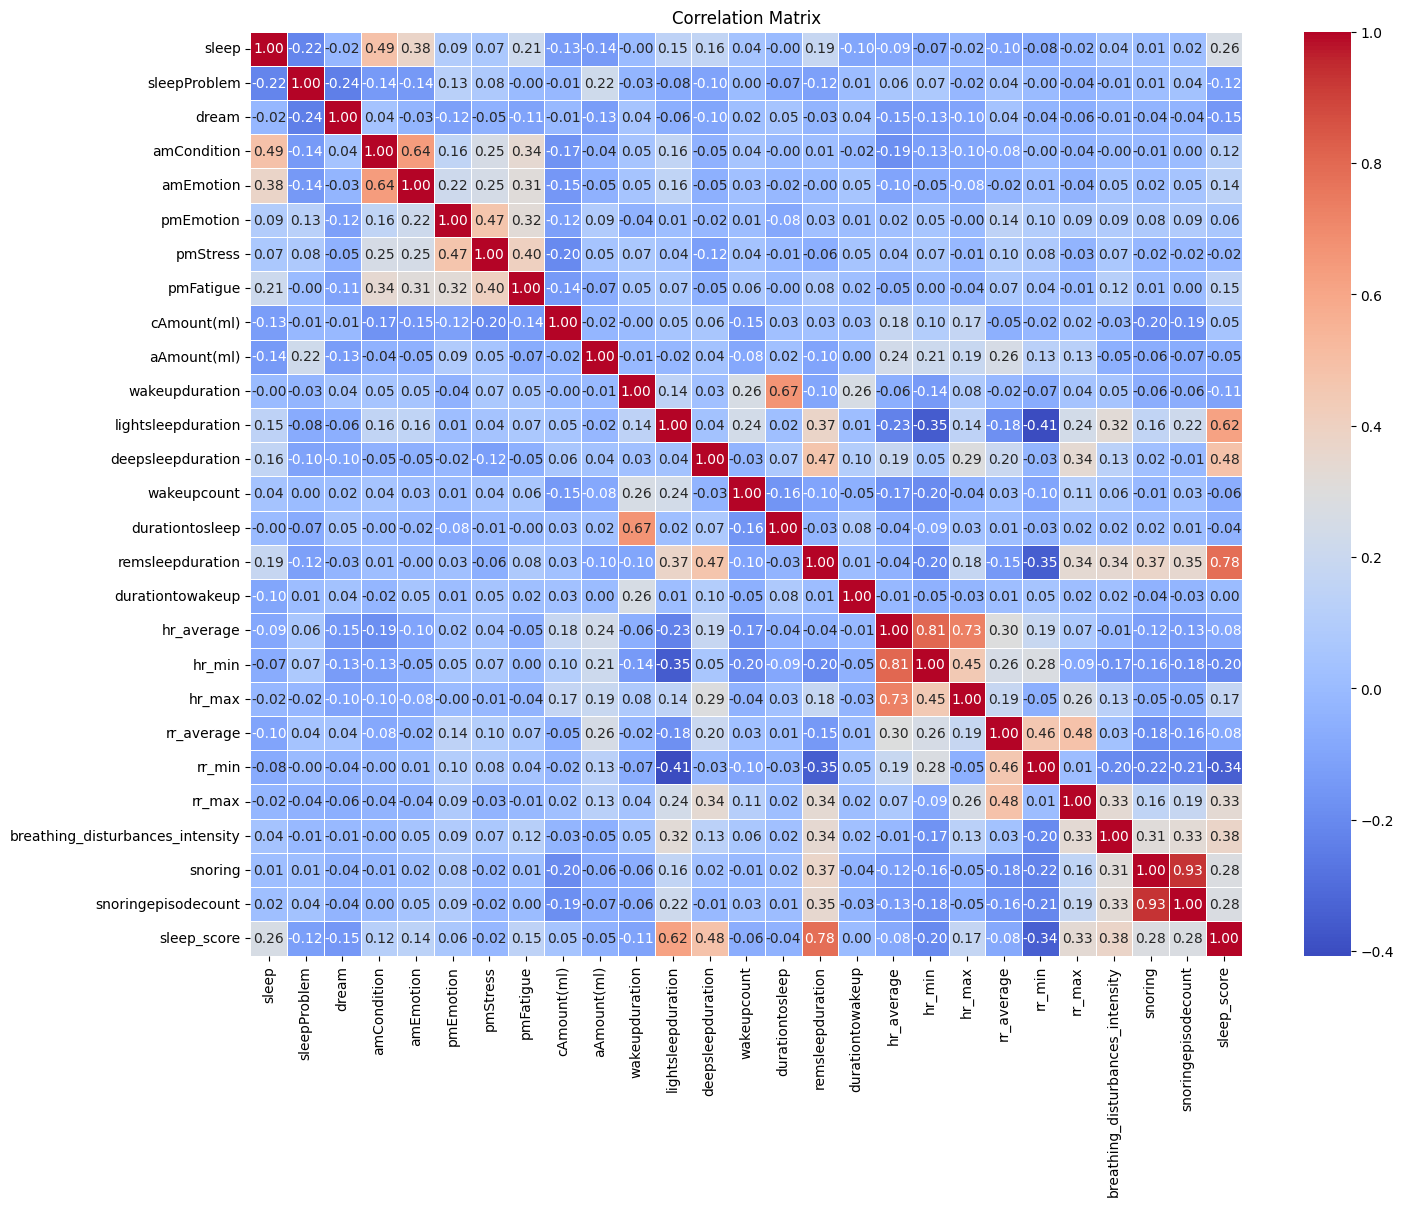

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 행렬 계산
corr_matrix = df_merged[['sleep', 'sleepProblem', 'dream', 'amCondition',
       'amEmotion', 'pmEmotion', 'pmStress', 'pmFatigue', 'cAmount(ml)',
       'aAmount(ml)', 'wakeupduration', 'lightsleepduration',
       'deepsleepduration', 'wakeupcount', 'durationtosleep',
       'remsleepduration', 'durationtowakeup', 'hr_average', 'hr_min',
       'hr_max', 'rr_average', 'rr_min', 'rr_max',
       'breathing_disturbances_intensity', 'snoring', 'snoringepisodecount',
       'sleep_score']].corr()

# 히트맵 시각화
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### (참고) 상관계수 행렬 : 추후 변수 조정에 활용 ★

# **모델링**

In [ ]:
# 특성과 라벨 분리
X = df_merged.drop(columns=['Q1', 'userId', 'date'])
y = df_merged['Q1']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터셋을 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 여러 모델 학습 및 평가
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc
    })

# PyTorch 딥러닝 모델 정의

# 1. Simple Neural Network
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# 2. Multilayer Perceptron
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

# 3. Convolutional Neural Network
class CNN(nn.Module):
    def __init__(self, input_dim):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(2)
        self.fc1 = nn.Linear(64 * (input_dim // 2 // 2 // 2), 64)
        self.fc2 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# 데이터셋을 PyTorch 텐서로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# CNN 모델용 데이터셋 형태 변환
X_train_tensor_cnn = X_train_tensor.view(X_train_tensor.size(0), 1, X_train_tensor.size(1))
X_test_tensor_cnn = X_test_tensor.view(X_test_tensor.size(0), 1, X_test_tensor.size(1))

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

train_dataset_cnn = TensorDataset(X_train_tensor_cnn, y_train_tensor)
train_loader_cnn = DataLoader(train_dataset_cnn, batch_size=32, shuffle=True)

# 모델 리스트
pytorch_models = {
    'Simple Neural Network': (SimpleNN(X_train.shape[1]), train_loader),
    'Multilayer Perceptron': (MLP(X_train.shape[1]), train_loader),
    'Convolutional Neural Network': (CNN(X_train.shape[1]), train_loader_cnn)
}

# PyTorch 모델 학습 및 평가
num_epochs = 50

for model_name, (model, loader) in pytorch_models.items():
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        if model_name == 'Convolutional Neural Network':
            y_pred_prob = model(X_test_tensor_cnn).numpy()
        else:
            y_pred_prob = model(X_test_tensor).numpy()
        y_pred = (y_pred_prob > 0.5).astype(int)
        y_prob = y_pred_prob

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc
    })

# 결과를 데이터프레임으로 변환
df_results = pd.DataFrame(results)

# 결과 출력
print(df_results)

                          Model  Accuracy  F1 Score  Precision    Recall  \
0           Logistic Regression  0.693069  0.747967   0.686567  0.821429   
1                 Random Forest  0.693069  0.747967   0.686567  0.821429   
2        Support Vector Machine  0.653465  0.724409   0.647887  0.821429   
3           K-Nearest Neighbors  0.603960  0.666667   0.625000  0.714286   
4         Simple Neural Network  0.613861  0.672269   0.634921  0.714286   
5         Multilayer Perceptron  0.623762  0.666667   0.655172  0.678571   
6  Convolutional Neural Network  0.623762  0.672414   0.650000  0.696429   

    ROC AUC  
0  0.699603  
1  0.722222  
2  0.703968  
3  0.581548  
4  0.606746  
5  0.615873  
6  0.663095  


- 실험 1 : 카페인/알코올 값 수정 버전 (본 코드) vs 안한 버전 : 본코드가 전체적으로 평균 0.02정도 높음
- 실험 2 : PCA 안한 버전 (본 코드) vs PCA 한 버전 : 본코드가 평균 0.03정도 높음

- PCA 한 버전

**하이퍼 파라미터 최적화 : 추후 조정**

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # 모델과 하이퍼파라미터 그리드 정의
# param_grids = {
#     'Logistic Regression': {
#         'C': [0.1, 1, 10, 100],
#         'solver': ['newton-cg', 'lbfgs', 'liblinear']
#     },
#     'Random Forest': {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [None, 10, 20, 30],
#         'min_samples_split': [2, 5, 10]
#     },
#     'Support Vector Machine': {
#         'C': [0.1, 1, 10, 100],
#         'kernel': ['linear', 'rbf', 'poly'],
#         'gamma': ['scale', 'auto']
#     },
#     'K-Nearest Neighbors': {
#         'n_neighbors': [3, 5, 7, 9],
#         'weights': ['uniform', 'distance']
#     }
# }

# # 최적화된 모델 결과를 저장할 리스트
# optimized_results = []

# # 각 모델에 대해 하이퍼파라미터 최적화 수행
# for model_name, model in models.items():
#     param_grid = param_grids[model_name]
#     grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
#     grid_search.fit(X_train, y_train)

#     best_model = grid_search.best_estimator_
#     y_pred = best_model.predict(X_test)
#     y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else None

#     accuracy = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

#     optimized_results.append({
#         'Model': model_name,
#         'Best Parameters': grid_search.best_params_,
#         'Accuracy': accuracy,
#         'F1 Score': f1,
#         'Precision': precision,
#         'Recall': recall,
#         'ROC AUC': roc_auc
#     })

# # 결과를 데이터프레임으로 변환
# df_optimized_results = pd.DataFrame(optimized_results)

# # 결과 출력
# print(df_optimized_results)

# **(참고) 데이터 load 테스트**

In [ ]:
# # Google Drive에 업로드한 디렉토리 경로
# directory = '/content/drive/My Drive/휴먼이해2024/val dataset'

# # 파일 리스트 불러오기
# file_list = [f for f in os.listdir(directory) if f.endswith('.gzip')]

# # 데이터프레임 저장 딕셔너리
# dataframes = {}

# # 각 파일을 데이터프레임으로 읽어서 딕셔너리에 저장
# for file in file_list:
#     file_path = os.path.join(directory, file)
#     df = pd.read_parquet(file_path)
#     dataframes[file] = df

# # 데이터프레임 확인
# for file, df in dataframes.items():
#     print(f"DataFrame for {file}:")
#     print(df.head())
#     print()


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


# import os
# import pandas as pd

# # Google Drive에 업로드한 디렉토리 경로
# directory = '/content/drive/My Drive/휴먼이해2024/val dataset'

# # 파일 리스트 불러오기
# file_list = [f for f in os.listdir(directory) if f.endswith('.gzip')]

# # 데이터프레임 저장 딕셔너리
# dataframes = {}

# # 각 파일을 하나씩 데이터프레임으로 읽어서 처리
# for file in file_list:
#     file_path = os.path.join(directory, file)
#     print(f"Processing file: {file}")
#     try:
#         df = pd.read_parquet(file_path)
#         dataframes[file] = df
#         print(f"Successfully processed {file}")
#     except Exception as e:
#         print(f"Error processing {file}: {e}")

#     # 데이터프레임 확인
#     print(f"DataFrame for {file}:")
#     print(df.head())
#     print()

#     # 메모리 해제
#     del df

# # 데이터프레임 확인
# for file, df in dataframes.items():
#     print(f"DataFrame for {file}:")
#     print(df.head())
#     print()


In [ ]:
!pip install py7zr

In [ ]:
# import py7zr
# import os
# import pandas as pd

# # .7z 파일 경로
# file_path = '/content/drive/My Drive/휴먼이해2024/train dataset/user01-06.7z'

# # 압축 해제할 디렉토리
# extract_dir = '/content/extracted_files'

# # 디렉토리가 존재하지 않으면 생성
# if not os.path.exists(extract_dir):
#     os.makedirs(extract_dir)

# # .7z 파일 압축 해제
# with py7zr.SevenZipFile(file_path, mode='r') as z:
#     z.extractall(path=extract_dir)

# # 압축 해제된 파일 리스트 불러오기
# extracted_files = [f for f in os.listdir(extract_dir) if f.endswith('.parquet')]

# # 데이터프레임 저장 딕셔너리
# dataframes = {}

# # 각 파일을 데이터프레임으로 읽어서 처리
# for file in extracted_files:
#     file_path = os.path.join(extract_dir, file)
#     print(f"Processing file: {file}")
#     try:
#         df = pd.read_parquet(file_path)
#         dataframes[file] = df
#         print(f"Successfully processed {file}")
#     except Exception as e:
#         print(f"Error processing {file}: {e}")

#     # 데이터프레임 확인
#     print(f"DataFrame for {file}:")
#     print(df.head())
#     print()

# # 데이터프레임 확인
# for file, df in dataframes.items():
#     print(f"DataFrame for {file}:")
#     print(df.head())
#     print()
